<a href="https://colab.research.google.com/github/aa10sh/Model_Collection/blob/main/Exp_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Radhe Radhe")

Radhe Radhe


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df=pd.read_csv('data.csv')

In [4]:
df.shape

(46907, 41)

data looks sufficient enough

In [6]:
df.sample(5)

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
32316,POL038324,8.3,0.4,48,C3,4076,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0.0,0.0
4402,POL020122,2.9,1.4,61,C8,8794,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2.0,0.0
7366,POL013480,5.8,0.0,44,C7,6112,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0.0,1.0
12046,POL001318,0.4,2.0,39,C20,20905,B2,M6,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2.0,0.0
14277,POL018453,12.3,0.0,36,C8,8794,B2,M5,Diesel,200Nm@3000rpm,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46907 entries, 0 to 46906
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         46907 non-null  object 
 1   subscription_length               46907 non-null  float64
 2   vehicle_age                       46907 non-null  float64
 3   customer_age                      46907 non-null  int64  
 4   region_code                       46907 non-null  object 
 5   region_density                    46907 non-null  int64  
 6   segment                           46907 non-null  object 
 7   model                             46907 non-null  object 
 8   fuel_type                         46907 non-null  object 
 9   max_torque                        46907 non-null  object 
 10  max_power                         46907 non-null  object 
 11  engine_type                       46907 non-null  object 
 12  airb

# column Description Below

policy_id: Unique identifier for the insurance policy.

subscription_length: The duration for which the insurance policy is active.

vehicle_age: Age of the vehicle insured.

customer_age: Age of the insurance policyholder.

region_code: The code representing the geographical region of the policyholder.

region_density: Population density of the policyholders region.

segment: Segment of the vehicle.

model: The model of the vehicle.

fuel_type: Type of fuel the vehicle uses (e.g., Petrol, Diesel, CNG).

max_torque, max_power: Engine performance characteristics.

engine_type: The type of engine.

airbags: The number of airbags in the vehicle.

is_esc (Electronic Stability Control): is_adjustable_steering, is_tpms (Tire Pressure Monitoring System): Features that enhance vehicle safety.

is_parking_sensors, is_parking_camera: Parking aids.
rear_brakes_type: Type of rear brakes.

displacement cylinder: Specifications related to the engine size and construction.

transmission_type: Type of transmission.

steering_type: Type of steering mechanism.

turning_radius: Turning radius of the vehicle.

length width gross_weight: Dimensions and weight of the vehicle.

is_front_fog_lights, is_rear_window_wiper, is_rear_window_washer, is_rear_window_defogger, is_brake_assist, is_power_door_locks, is_central_locking, is_power_steering, is_driver_seat_height_adjustable, is_day_night_rear_view_mirror, is_ecw, is_speed_alert: Various binary indicators for specific vehicle amenities and safety features.

ncap_rating: NCAP safety rating of the vehicle.

claim_status: Indicates whether a claim was made (1) or not (0).

In [8]:
df.isna().sum().value_counts()

,count
0,33
1,8


In [9]:
df.duplicated().value_counts()

,count
False,46907


ploicy id did not play any role for prediction, so remove it

In [10]:
df.drop(columns='policy_id', axis=1, inplace=True)

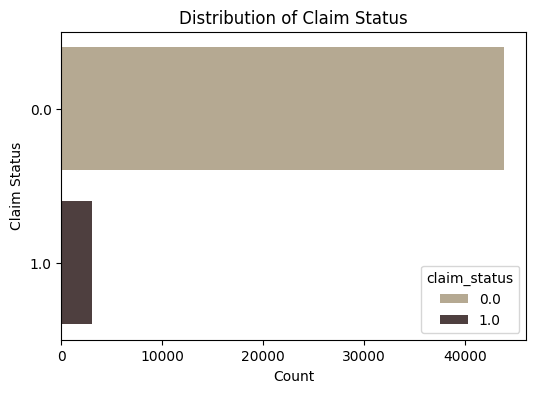

In [11]:
# Creating a count plot to visualize the distribution of claim status
plt.figure(figsize=(6, 4))
sns.countplot(data=df, y='claim_status', hue='claim_status', palette=['#BBAB8C', '#503C3C'])
plt.xlabel('Count')
plt.ylabel('Claim Status')
plt.title('Distribution of Claim Status')
plt.show()

Data set looks Baised , so we should do oversampling

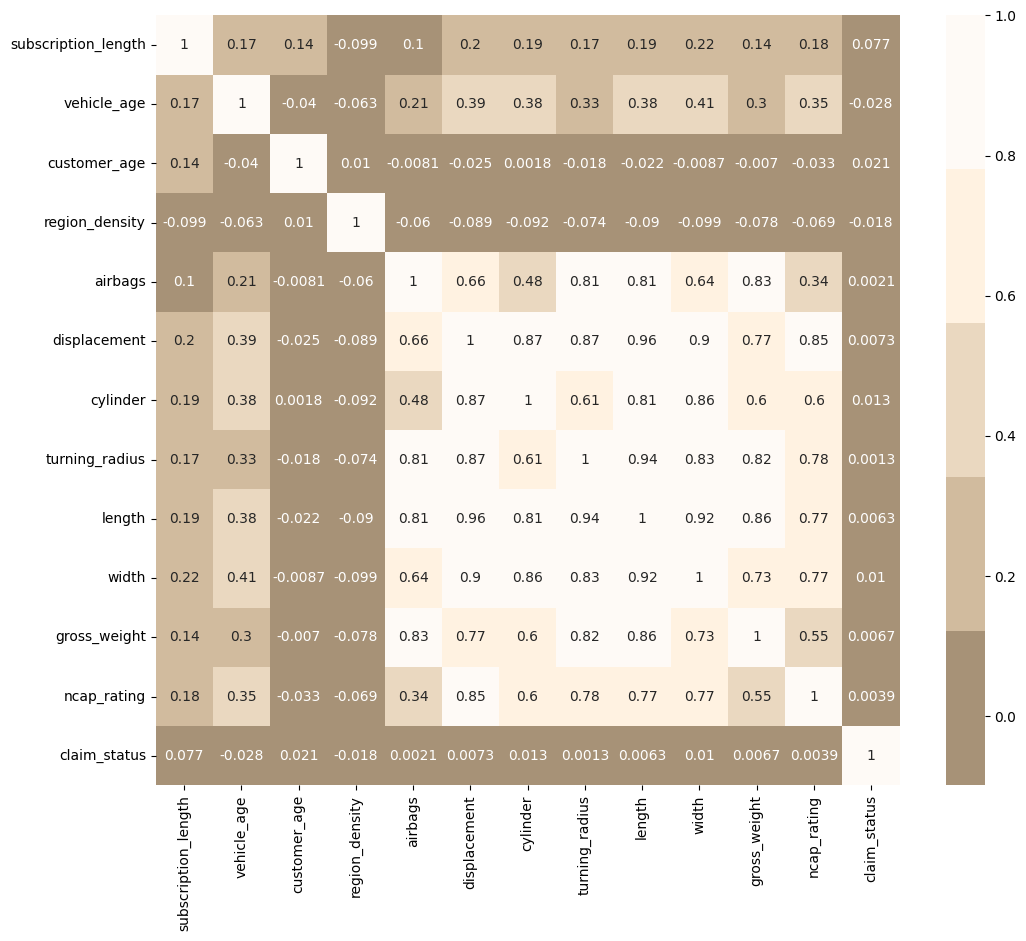

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap=['#A79277', '#D1BB9E', '#EAD8C0', '#FFF2E1', '#FEFAF6'])
plt.show()

Oversampling

In [13]:
minority=df[df['claim_status']==1]
majority=df[df['claim_status']==0]

In [14]:
minority.shape

(3027, 40)

In [15]:
majority.shape

(43879, 40)

In [16]:
from sklearn.utils import resample

In [17]:
minority_oversampled=resample(minority, replace=True, n_samples=len(majority), random_state=42)

In [18]:
minority_oversampled.shape

(43879, 40)

Now both Majority(NO) and Minority(Yes) counts are equal

Now lets create a new dataframe with oversampled data

In [19]:
oversampled_data=pd.concat([majority, minority_oversampled])

In [20]:
oversampled_data.shape

(87758, 40)

In [23]:
oversampled_data.claim_status.value_counts()

,count
claim_status,
0.0,43879
1.0,43879


Since it is a classification problem we dont need Standard Scaling

we can simply perform label encoding

In [24]:
from sklearn.preprocessing import LabelEncoder
lbe=LabelEncoder()

In [30]:
encoded_oversampled_data=oversampled_data.apply(lambda col: lbe.fit_transform(col) if col.dtypes=='object' else col )

In [31]:
encoded_oversampled_data.sample(5)

,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
9477,11.4,1.4,59,20,8794,2,7,2,0,6,...,1,1,1,1,1,1,1,1,2.0,1.0
31550,2.1,0.8,36,19,6112,2,7,2,0,6,...,1,1,1,1,1,1,1,1,2.0,0.0
4965,9.2,0.0,40,15,4076,2,7,2,0,6,...,1,1,1,1,1,1,1,1,2.0,1.0
12739,10.4,0.4,59,15,4076,2,7,2,0,6,...,1,1,1,1,1,1,1,1,2.0,1.0
26163,10.4,3.4,47,20,8794,2,7,2,0,6,...,1,1,1,1,1,1,1,1,2.0,0.0


In [32]:
X=encoded_oversampled_data.drop('claim_status', axis=1)
Y=encoded_oversampled_data['claim_status']

In [33]:
X.shape

(87758, 39)

In [34]:
Y.shape

(87758,)

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf_model_demo=RandomForestClassifier(random_state=42)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [42]:
X_train.shape

(61430, 39)

In [40]:
X_test.shape

(26328, 39)

In [43]:
rf_model_demo.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [44]:
y_pred_demo=rf_model_demo.predict(X_test)

In [45]:
print(classification_report(y_test, y_pred_demo))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     13166
         1.0       0.96      1.00      0.98     13162

    accuracy                           0.98     26328
   macro avg       0.98      0.98      0.98     26328
weighted avg       0.98      0.98      0.98     26328



In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
cv_score=cross_val_score(rf_model_demo, X_train, y_train, cv=5, scoring='accuracy')

In [49]:
print("Mean Accuracy:", cv_score.mean())
print("Standard Deviation of Accuracy:", cv_score.std())

Mean Accuracy: 0.971447175647078
Standard Deviation of Accuracy: 0.0012022009075459623


Accuracy is quit good but no of feature are 39 which is not good for real world predictions, so we will try to reduce it

In [51]:
feature_importance = rf_model_demo.feature_importances_


In [52]:
# Create a DataFrame to store feature names and their corresponding importances
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by feature importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
features_df.head(10)

,Feature,Importance
0,subscription_length,0.374942
2,customer_age,0.240809
1,vehicle_age,0.215542
4,region_density,0.072686
3,region_code,0.072602
6,model,0.001904
25,gross_weight,0.001821
18,displacement,0.001789
5,segment,0.001672
23,length,0.001426


lets save previous model first , because it is not certain that we will got enough accuracy with reduced features

In [54]:
import pickle

with open("rf_model_demo.pkl", "wb") as f:
    pickle.dump(rf_model_demo, f)

with open("rf_model_demo.pkl", "rb") as f:
    model = pickle.load(f)

Now we will train model with only 10 important features

In [55]:
encoded_oversampled_data.shape

(87758, 40)

In [57]:
X.shape

(87758, 39)

In [58]:
selected_features = ['subscription_length', 'customer_age', 'vehicle_age', 'region_density', 'region_code', 'model', 'gross_weight', 'displacement', 'segment', 'length']
X_new = encoded_oversampled_data[selected_features]
Y_new = encoded_oversampled_data['claim_status']

In [59]:
X_new.shape

(87758, 10)

In [60]:
Y_new.shape

(87758,)

In [69]:
X_new_train, X_new_test, y_new_train, y_new_test= train_test_split(X_new, Y_new, test_size=0.3, random_state=42)

In [70]:
rf_model_new=RandomForestClassifier(random_state=42)

In [71]:
y_new_train.shape

(61430,)

In [75]:
X_new_test.shape

(26328, 10)

In [76]:
rf_model_new.fit(X_new_train, y_new_train)

RandomForestClassifier(random_state=42)

In [77]:
y_pred_new=rf_model_new.predict(X_new_test)

In [78]:
print(classification_report(y_new_test, y_pred_new))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     13166
         1.0       0.96      1.00      0.98     13162

    accuracy                           0.98     26328
   macro avg       0.98      0.98      0.98     26328
weighted avg       0.98      0.98      0.98     26328



In [79]:
cv_score_new=cross_val_score(rf_model_demo, X_new_train, y_new_train, cv=5, scoring='accuracy')

In [80]:
print("Mean Accuracy:", cv_score_new.mean())
print("Standard Deviation of Accuracy:", cv_score_new.std())

Mean Accuracy: 0.9729936513104347
Standard Deviation of Accuracy: 0.0008787478154820474


# By selecting only top features the accuracy is still fine, so we will only consider these 10 further

Now let's save this model

In [81]:
with open("rf_model_new.pkl", "wb") as f:
    pickle.dump(rf_model_new, f)

with open("rf_model_new.pkl", "rb") as f:
    model = pickle.load(f)